<a href="https://colab.research.google.com/github/DataEtnos/estudos_python/blob/main/PROJETO_PRATICO_DNC_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [367]:
#importando todas as bibliotecas que vou ultilizar neste projeto
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express  as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [368]:
#chamando a base do  meu pc local
base =  pd.read_csv("/content/MKT.csv",sep = ",")

In [369]:
base.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [370]:
#Verificando a base pelas primeiras 5 linhas para entender a base
base.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [371]:
#verificando se existe dados nulos ou se precisa mudar o tipo de dado da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [372]:
#Fazendo uma analises descritiva simples
base.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [373]:
# Aqui analisei os quartil de  vendas para saber aonde se concentra os valores.
fig = px.box(base, x = "sales" )
fig.update_traces(line_color = "red")

In [374]:
# Aqui analisei os quartil de  facebook para saber aonde se concentra os valores dos investimentos , max e minimo  e a media (Analise descritiva )
fig = px.box(base, x = "facebook" )
fig.update_traces(line_color = "blue")

In [375]:
# Aqui analisei os quartil de  newspaper para saber aonde se concentra os valores dos investimentos , max e minimo  e a media (Analise descritiva )
fig = px.box(base, x = "newspaper" )
fig.update_traces(line_color = "pink")

In [376]:
# Aqui analisei os quartil de  youtube para saber aonde se concentra os valores dos investimentos , max e minimo  e a media (Analise descritiva )
fig = px.box(base, x = "youtube" )
fig.update_traces(line_color = "gray")

In [377]:
# Verificando os valores que o youtube conseguiu converter em sales(vendas) e o valor investido em youtube
fig =  px.box(base,x="sales",y="youtube")
fig.update_traces(line_color = "red")

In [378]:
# Verificando os valores que o facebook conseguiu converter em sales(vendas) e o valor investido em youtube
fig =  px.box(base,x="sales",y="facebook")
fig.update_traces(line_color = "blue")

In [379]:
# Verificando os valores que o newspaper conseguiu converter em sales(vendas) e o valor investido em youtube
fig =  px.box(base,x="sales",y="newspaper")
fig.update_traces(line_color = "green")

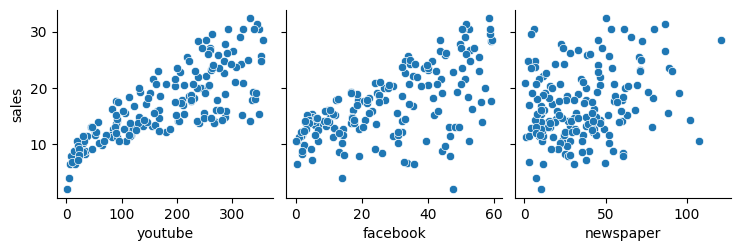

In [380]:
#aqui eu vejo a correlação dos dados com  vendas e quais são as redes sociais com mais resultado em vendas
sns.pairplot(base ,x_vars =["youtube","facebook","newspaper"], y_vars=["sales"])

<Axes: >

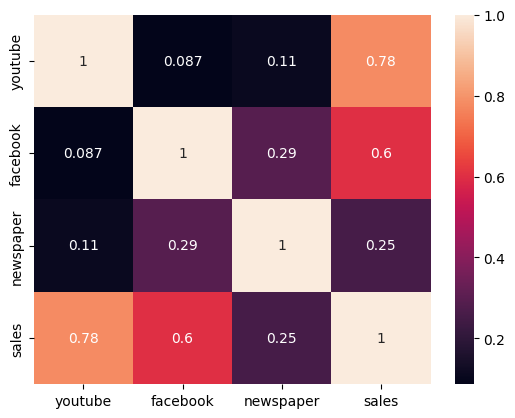

In [381]:
#Atraves do heatmap  quis fazer a verificação de qual é a plataforma que melhor converte vendas
sns.heatmap(base.corr(),annot= True)

<Axes: xlabel='sales', ylabel='Count'>

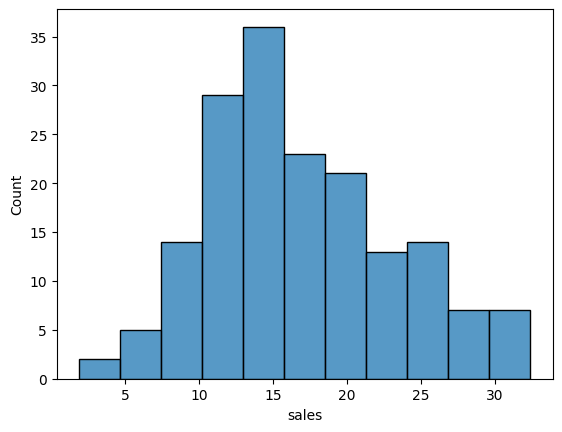

In [382]:
#Aqui vejo distribuição de vendas (sales)
sns.histplot(base["sales"])

#Analises das conversões de vendas das redes sociais
Apos algumas analises verifiquei o youtube é a rede aonde mais se converte emm vendas pórem é o que mais recebe investimentos dentre os 3 , ja o newpapers apesar de receber o segundo maior investimento não consegue converter tanto o youtube e tendo um retorno de vendas pior que o facebook que recebe um investimento menor porem tem  resultado proximo ao youtube.

In [383]:
#Fazendo a separação de x e y para os teste de regressão linear

x = base[["youtube","facebook", "newspaper"]]

y = base [["sales"]]

In [384]:
# descrevendo o tamanho de treino e de teste separando
x_train, x_test, y_train,y_test =  train_test_split(x,y,train_size=0.7 , test_size = 0.3,random_state =100)

In [385]:
#Verificando o tamanho de treino e de teste
print("x de treino :",x_train.shape)
print("x de teste :",x_test.shape)
print("y de treino :",y_train.shape)
print("y de teste : ",y_test.shape)

x de treino : (119, 3)
x de teste : (52, 3)
y de treino : (119, 1)
y de teste :  (52, 1)


In [386]:
# Apreviando o linearRegression numa variavel
lm = LinearRegression()

In [387]:
#treino do modelo
lm.fit(x_train, y_train)

LinearRegression()

In [388]:
# anexando o resultado do modelo em outra variavel para teste
y_pred =  lm.predict(x_test)


In [389]:
#verificando a eficacia do modelo com o metodo r2_score
r = r2_score(y_test, y_pred)

In [390]:
#resultando que ate o momento me garante 90 % das predições
print("r_quadrado",r)

r_quadrado 0.9077879242447484


Text(0, 0.5, 'sales')

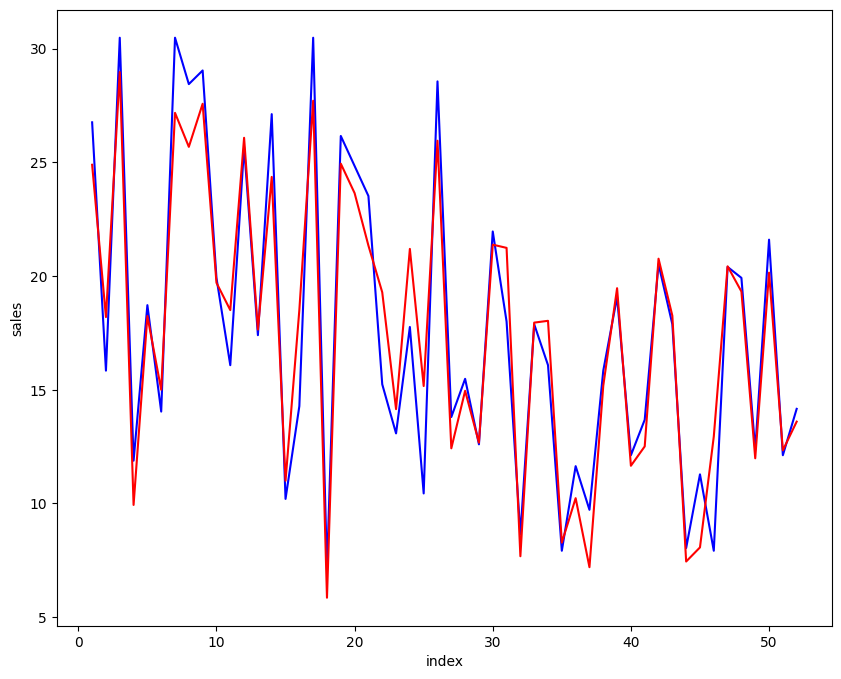

In [391]:
#importanto grafico para avaliar teste e treino de regressão linear
c = [i for i in range(1,53,1)]
fig = plt.figure(figsize=(10,8))
plt.plot(c, y_test, color = "blue")
plt.plot(c , y_pred, color="red")
plt.xlabel("index")
plt.ylabel("sales")

In [392]:
#predições
facebook = 10
youtube =30
newspaper = 20
entrada = [[facebook, youtube, newspaper]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([9.44186095])